# Assignment to do:
* Calculate $P_c$ and $T_c$ two ways (HSE and Virial), compare with each other and known, discuss
* In HRD add line of constant radius.  What is the physical law that defines it?
* Revisit profile analysis.  How does $P_c$, $T_c$ evolve?  Compare ideal gas derivation to actual result.

In [1]:
%pylab 
from nugridpy import nugridse as mp
from nugridpy import mesa as ms

data_dir="/data/nugrid_apod2/"    

ms.set_nugrid_path(data_dir)
mp.set_nugrid_path(data_dir)

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


## Calculate $P_c$ and $T_c$ two ways (HSE and Virial), compare with each other and known, discuss

### HSE

$\frac{dP}{dr} = -\frac{GM\rho}{r^2}$

$\int^{P_c}_{0}dP = -\int^{0}_{R_*}\frac{GM<\rho>}{r^2}$

$P_c = \frac{GM<\rho>}{R_*}$

* $P_c = \frac{R}{\mu}\rho T_c$

$T_c = \frac{\mu}{R}\frac{GM}{R_*}$

$T_c = 1.16\times10^7 K$ for Sun


### Virial

$2K + U = 0$

* $K = CvT = \frac{3}{2}RT$ where R = 8.314$\frac{J}{mol K}$
* $U = -\frac{GM}{R_*}$

$3RT - \frac{GM}{R_*} = 0$

$T = \frac{GM}{3RR_*}$

$T = 7.69\times10^9 K$ for Sun (complete collapse)

### Known
Known value for central temperature of the sun is on the order of ~$1.5\times10^7 K$

## In HRD add line of constant radius.  What is the physical law that defines it?

In [2]:
Mstar = 6.0
Zstar = 0.02

s=ms.star_log(mass=Mstar,Z=Zstar)

nugrid_path = /data/nugrid_apod2/
closest set is set1.2 (Z = 0.02)
closest mass is 6.0
Using old star.logsa file ...
 reading ...100% 



In [22]:
Teff = np.arange(np.power(10,3.),np.power(10,4.5),10)
Rsun = 6.957E8   #m
Lsun = 3.828E26   #W
sb = 5.67E-8
R1 = 1*Rsun
R5 = 5*Rsun
R10 = 10*Rsun
R15 = 15*Rsun
R20 = 20*Rsun
R50 = 50*Rsun
L1 = 4*np.pi*np.power(R1,2)*sb*np.power(Teff,4)/Lsun
L5 = 4*np.pi*np.power(R5,2)*sb*np.power(Teff,4)/Lsun
L10 = 4*np.pi*np.power(R10,2)*sb*np.power(Teff,4)/Lsun
L15 = 4*np.pi*np.power(R15,2)*sb*np.power(Teff,4)/Lsun
L20 = 4*np.pi*np.power(R20,2)*sb*np.power(Teff,4)/Lsun
L50 = 4*np.pi*np.power(R50,2)*sb*np.power(Teff,4)/Lsun

<IPython.core.display.Javascript object>


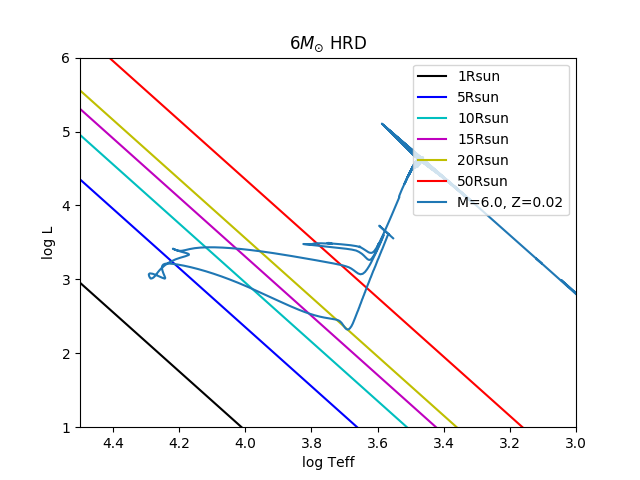

In [27]:
plt.plot(np.log10(Teff),np.log10(L1),'k-',label='1Rsun')
plt.plot(np.log10(Teff),np.log10(L5),'b-',label='5Rsun')
plt.plot(np.log10(Teff),np.log10(L10),'c-',label='10Rsun')
plt.plot(np.log10(Teff),np.log10(L15),'m-',label='15Rsun')
plt.plot(np.log10(Teff),np.log10(L20),'y-',label='20Rsun')
plt.plot(np.log10(Teff),np.log10(L50),'r-',label='50Rsun')
plt.xlim(4.5,3.)
plt.ylim(1,6)
s.hrd_new()
plt.legend(loc='upper right')
plt.title('6$M_{\odot}$ HRD')

## Revisit profile analysis.  How does $P_c$, $T_c$ evolve?  Compare ideal gas derivation to actual result.

In [41]:
logPc = s.get('log_center_P')
logTc = s.get('log_center_T')
logrhoc = s.get('log_center_Rho')

In [45]:
mu = 0.5
R = 8248.7
logPcideal = np.log10(R/mu)+logrhoc+logTc
logrhocideal = logPc - np.log10(R/mu) - logTc

<IPython.core.display.Javascript object>


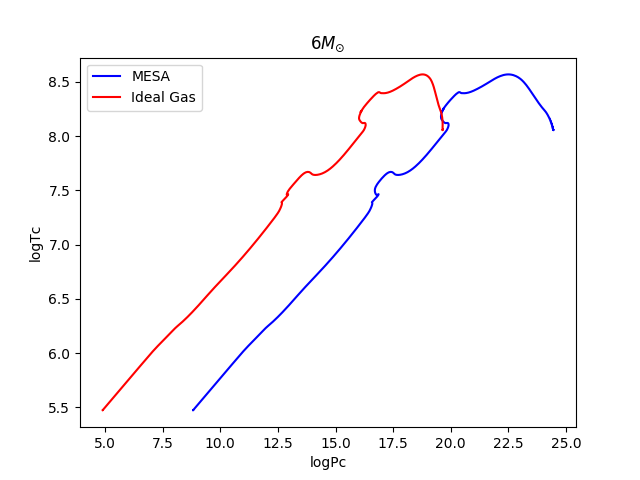

In [46]:
plt.figure()
plt.plot(logPc,logTc,'b-',label='MESA')
plt.plot(logPcideal,logTc,'r-',label='Ideal Gas')
plt.xlabel('logPc')
plt.ylabel('logTc')
plt.title('6$M_{\odot}$')
plt.legend(loc='best')
plt.show()

<IPython.core.display.Javascript object>


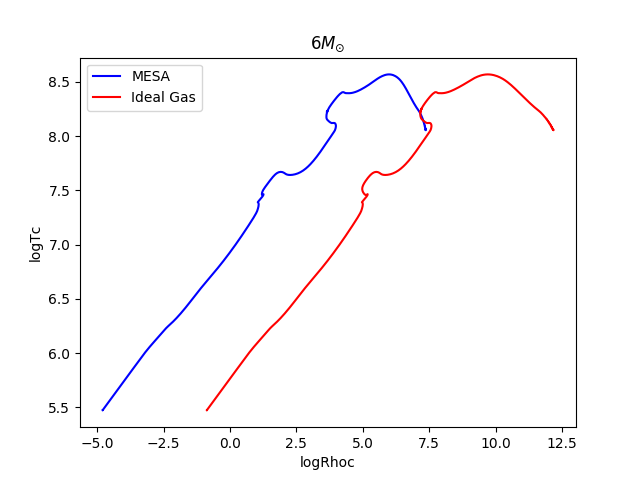

In [47]:
plt.figure()
plt.plot(logrhoc,logTc,'b-',label='MESA')
plt.plot(logrhocideal,logTc,'r-',label='Ideal Gas')
plt.xlabel('logRhoc')
plt.ylabel('logTc')
plt.title('6$M_{\odot}$')
plt.legend(loc='best')
plt.show()